# Read the data

In [1]:
# %pip install tslearn kmedoids # https://python-kmedoids.readthedocs.io/en/latest/

In [2]:
from utils import *

In [3]:
# Importation des données
X = pd.read_csv("data/X.txt", sep=" ", header=None)
APPART = pd.read_csv("data/APPART.txt", sep=" ", header=None)
JOUR = pd.read_csv("data/JOUR.txt", sep=" ", header=None)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.786785,-1.759306,-1.731826,-1.657497,-1.504801,-1.303554,-1.099353,-0.939600,-0.834307,-0.642136,...,1.796293,1.746644,1.617929,1.374530,0.991029,0.564313,0.200768,-0.077526,-0.276923,-0.433195
1,-0.394478,-0.634234,-0.873990,-1.012224,-0.992106,-0.935577,-0.966903,-1.040886,-1.074217,-1.000619,...,0.835603,0.970470,1.115326,1.143106,0.943505,0.560883,0.094956,-0.287792,-0.456911,-0.492853
2,-1.216742,-1.395422,-1.574103,-1.741657,-1.879992,-1.943143,-1.897188,-1.784239,-1.650855,-1.485354,...,1.153940,1.267196,1.333831,1.347890,1.308287,1.199404,1.006899,0.736046,0.401007,0.031883
3,-0.796512,-1.189678,-1.582845,-1.883616,-2.029875,-2.080617,-2.097591,-2.032449,-1.835092,-1.558510,...,1.156785,1.309893,1.248746,1.033263,0.756840,0.522058,0.398940,0.318105,0.197855,0.046630
4,-0.077746,-0.709023,-1.340300,-1.873472,-2.216010,-2.297673,-2.089215,-1.703073,-1.269871,-0.851312,...,1.526477,1.661399,1.647645,1.470649,1.130163,0.676563,0.177488,-0.281004,-0.634296,-0.921962


# Calculate the distance matrix

## Using euclidean distance

In [5]:
# calculate distance matrix with euclidean distance
from scipy.spatial.distance import pdist, squareform
dist_matrix_euc = pdist(X, metric='euclidean')
dist_matrix_euc = squareform(dist_matrix_euc)
dist_matrix_euc.shape

(9100, 9100)

## Using DTW distance

In [6]:
# this code takes about an hour to run or more (depending on the machine) 
# so we have saved the results in a file called dist_matrix_euc.npy

# calculate cdist_dtw (tslearn.metrics.cdist_dtw) for each time series in X
# and store the results in a matrix called dist_matrix
import time 

start_time = time.time()
from tslearn.metrics import cdist_dtw

dist_matrix = cdist_dtw(X, n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))

# save dist_matrix to a file
np.save("dist_matrix.npy", dist_matrix)

In [7]:
# # load "dist_matrix.npy"
# import numpy as np
# dist_matrix_dtw = np.load("dist_matrix.npy")
# dist_matrix_dtw.shape

(9100, 9100)

# FasterPAM KMedoids

In [8]:
import kmedoids

inertias_dict = dict()
silhouettes_dict = dict()
Y_matrices_dict = dict()

## Using DTW distance

In [9]:
clust_method = lambda k: kmedoids.KMedoids(n_clusters=k, random_state=42, method="fasterpam")

inertias, silhouettes, labels = run_clustering_method(clust_method, dist_matrix_dtw, verbose=False)
inertias_dict["KMedoids_DTW"] = inertias
silhouettes_dict["KMedoids_DTW"] = silhouettes
Y_matrices_dict["KMedoids_DTW"] = labels

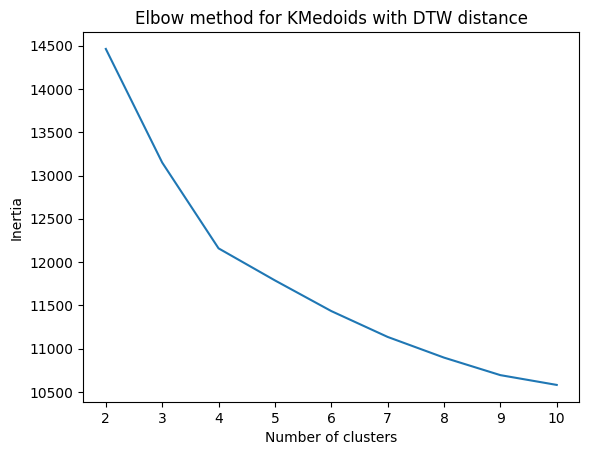

In [10]:
# elbow method
plot_inertia(inertias_dict["KMedoids_DTW"],
             title="Elbow method for KMedoids with DTW distance")

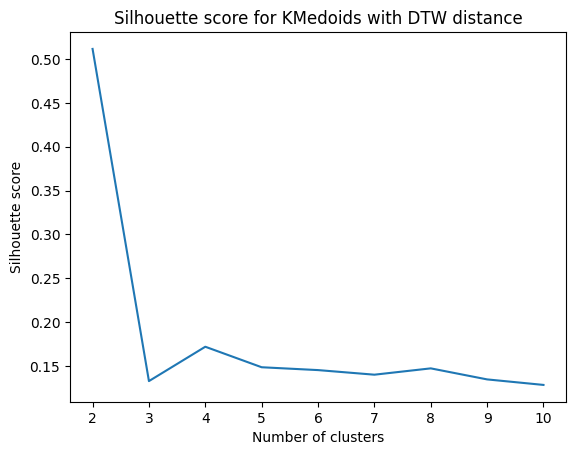

In [11]:
# silhouette score
plot_silhouette(silhouettes_dict["KMedoids_DTW"],
                title="Silhouette score for KMedoids with DTW distance")

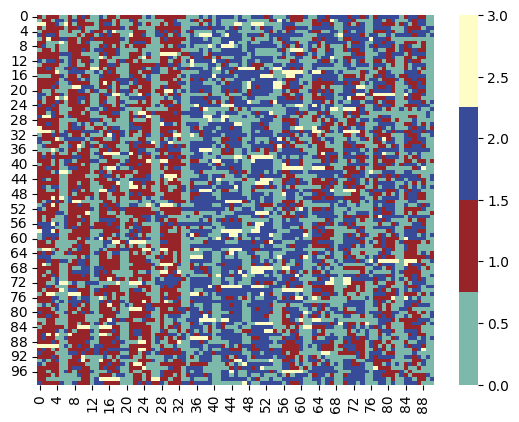

In [12]:
# display the clusters in a heatmap (Y) try different colormaps
Y = Y_matrices_dict["KMedoids_DTW"][4].reshape(100, 91)
plot_heatmap(Y)

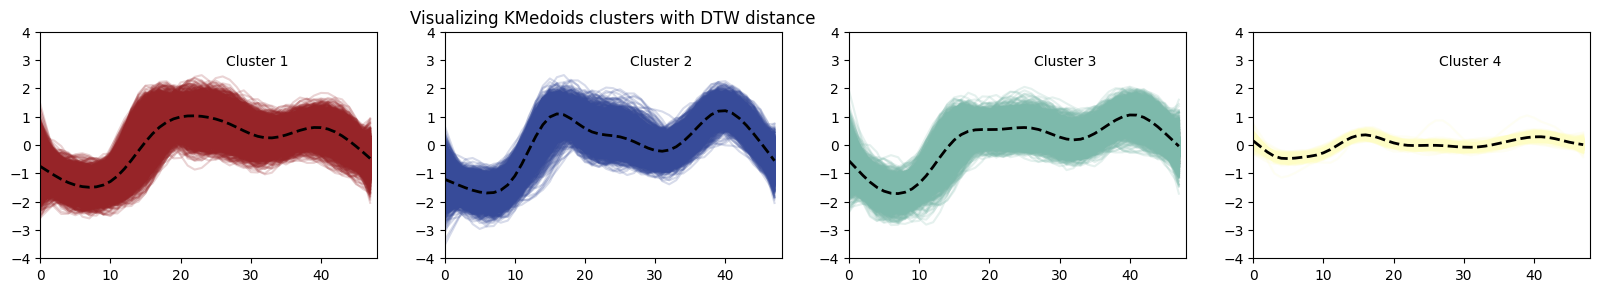

In [13]:
visualize_clusters(X, Y_matrices_dict["KMedoids_DTW"][4], "Visualizing KMedoids clusters with DTW distance")

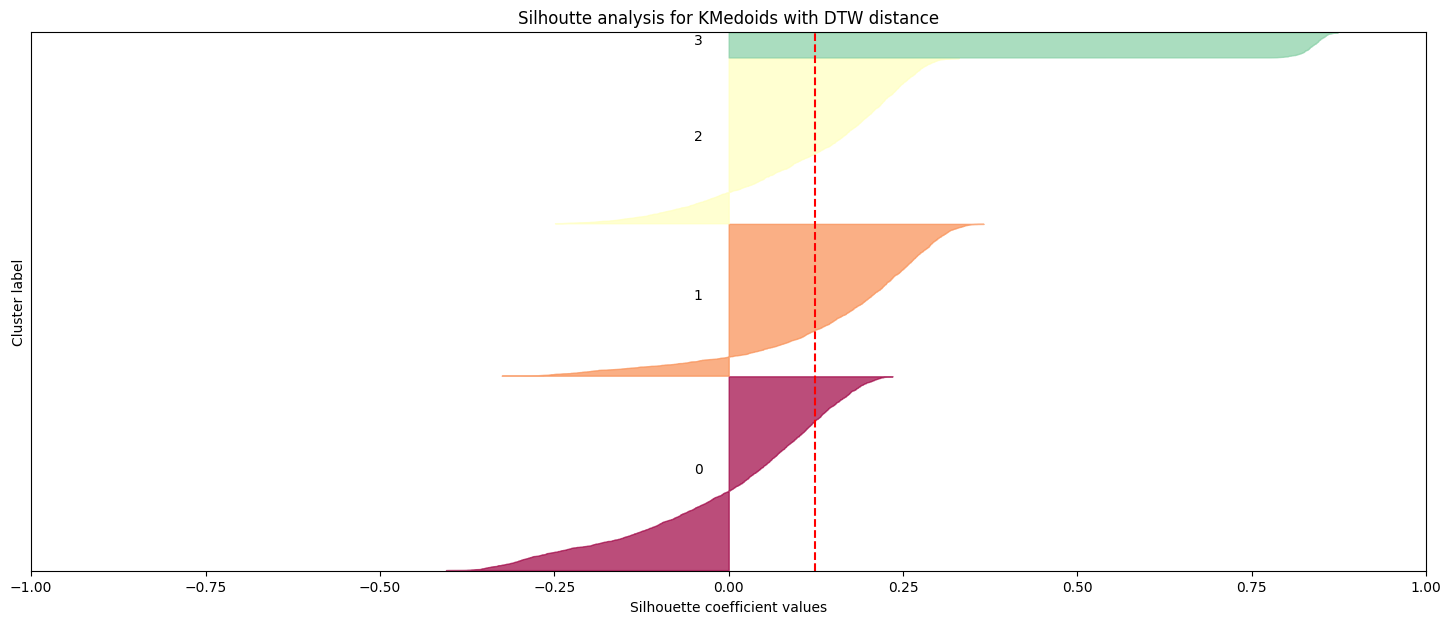

In [14]:
plot_silhouette_analysis(X, Y_matrices_dict["KMedoids_DTW"][4], "Silhoutte analysis for KMedoids with DTW distance")

## Using euclidean distance

In [15]:
clust_method = lambda k: kmedoids.KMedoids(n_clusters=k, random_state=42, method="fasterpam")
inertias, silhouettes, labels = run_clustering_method(clust_method, dist_matrix_euc, verbose=False)
inertias_dict["KMedoids_EUC"] = inertias
silhouettes_dict["KMedoids_EUC"] = silhouettes
Y_matrices_dict["KMedoids_EUC"] = labels

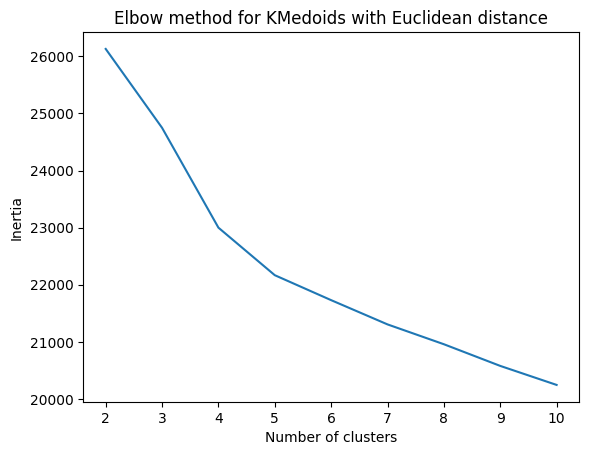

In [16]:
# elbow method
plot_inertia(inertias_dict["KMedoids_EUC"],
             title="Elbow method for KMedoids with Euclidean distance")

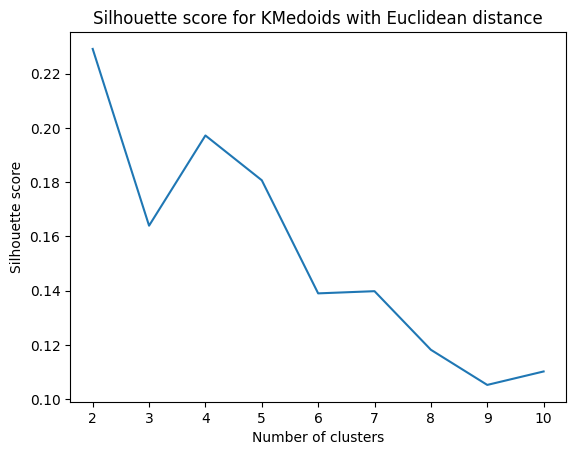

In [17]:
# silhouette score
plot_silhouette(silhouettes_dict["KMedoids_EUC"],
                title="Silhouette score for KMedoids with Euclidean distance")

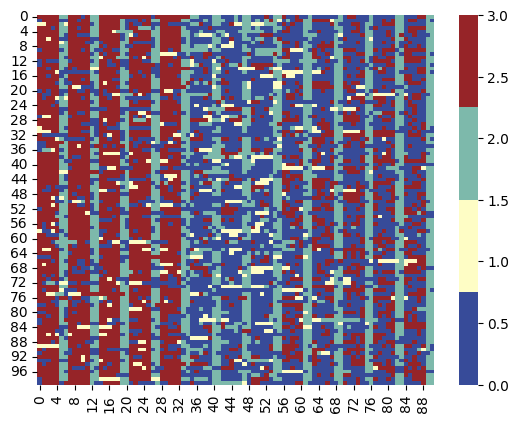

In [18]:
# display the clusters in a heatmap (Y) try different colormaps
Y = Y_matrices_dict["KMedoids_EUC"][4].reshape(100, 91)
plot_heatmap(Y, cmap=[blue, yellow, green, red])

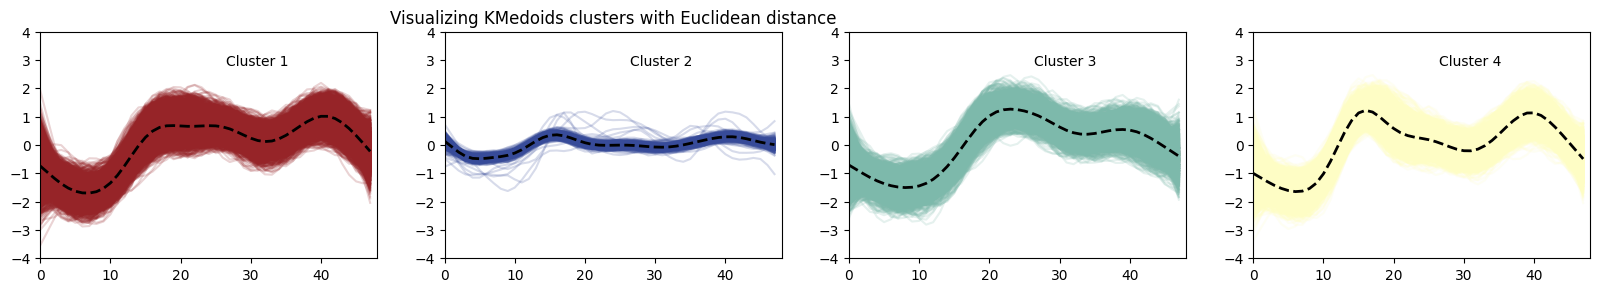

In [19]:
visualize_clusters(X, Y_matrices_dict["KMedoids_EUC"][4], "Visualizing KMedoids clusters with Euclidean distance")

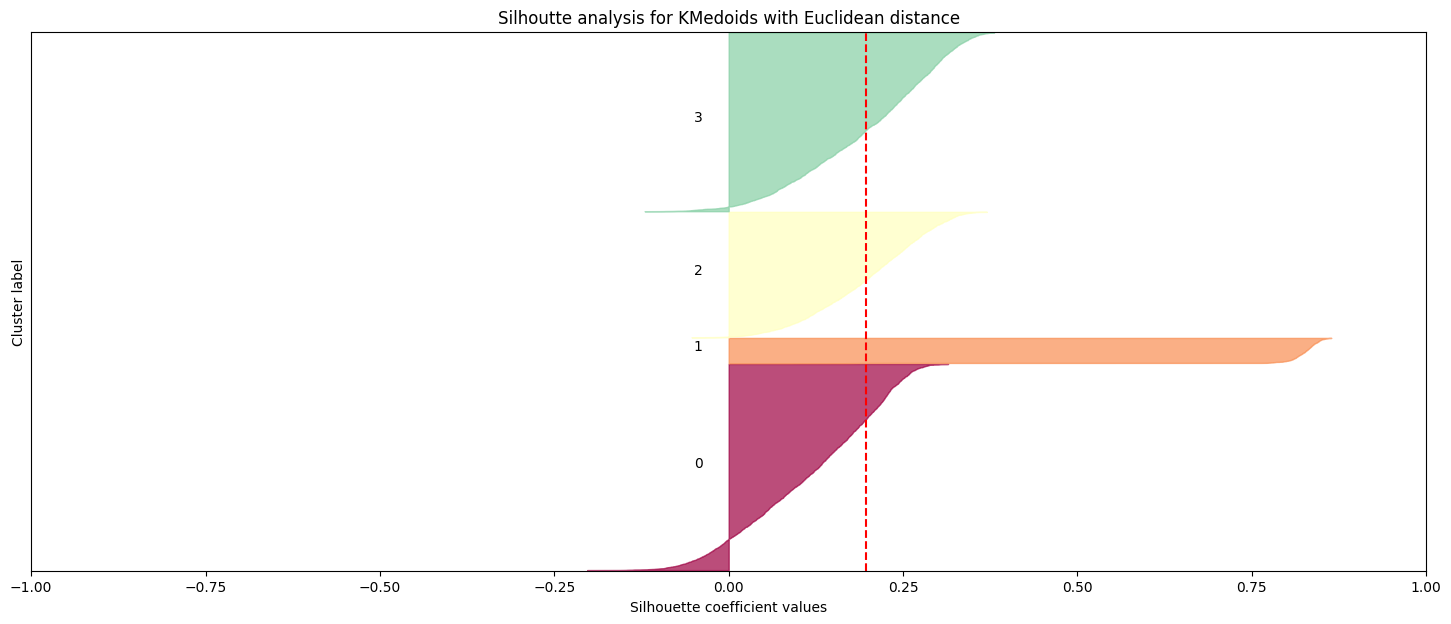

In [20]:
plot_silhouette_analysis(X, Y_matrices_dict["KMedoids_EUC"][4], "Silhoutte analysis for KMedoids with Euclidean distance")

# CAH clustering

## Using DTW distance

In [21]:
# apply CAH on dist_matrix
from sklearn.cluster import AgglomerativeClustering

clust_method = lambda k: AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='complete', compute_distances=True)
inertias, silhouettes, labels = run_clustering_method(clust_method, dist_matrix_dtw, verbose=False)

inertias_dict["CAH_DTW"] = inertias
silhouettes_dict["CAH_DTW"] = silhouettes
Y_matrices_dict["CAH_DTW"] = labels

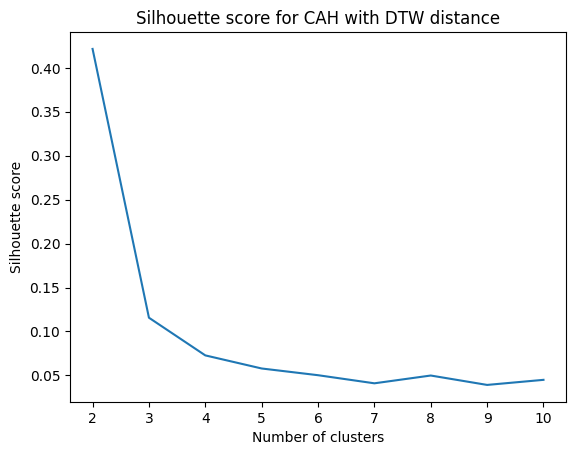

In [22]:
# silhouette score (the higher the better)
plot_silhouette(silhouettes_dict["CAH_DTW"],
                title="Silhouette score for CAH with DTW distance")

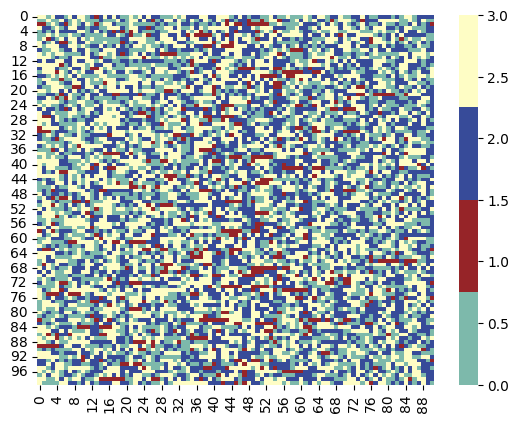

In [23]:
# display the clusters in a heatmap (Y) try different colormaps
Y = Y_matrices_dict["CAH_DTW"][4].reshape(100, 91)
plot_heatmap(Y)

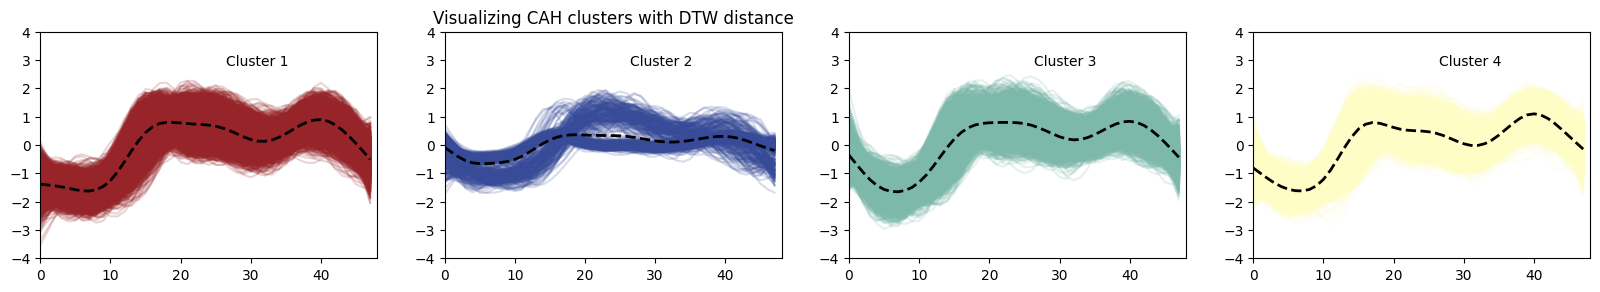

In [24]:
visualize_clusters(X, Y_matrices_dict["CAH_DTW"][4], "Visualizing CAH clusters with DTW distance")

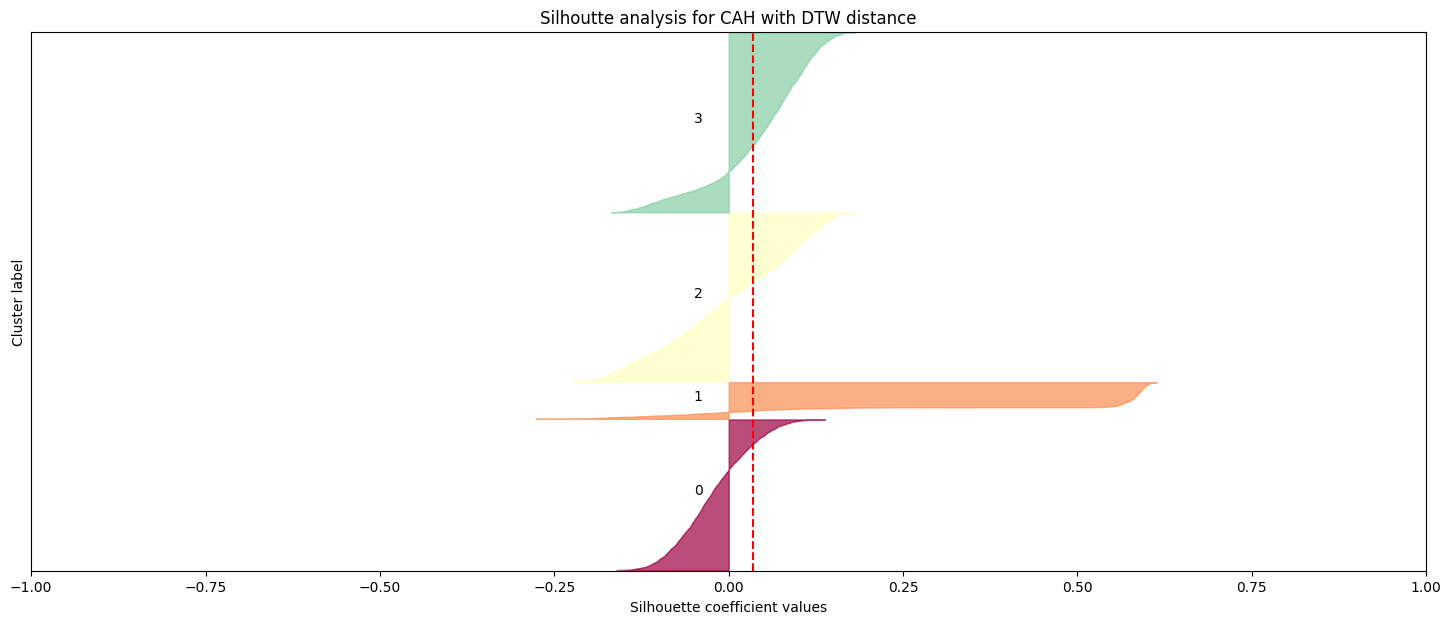

In [85]:
plot_silhouette_analysis(X, Y_matrices_dict["CAH_DTW"][4], "Silhoutte analysis for CAH with DTW distance")

## Using euclidean distance

In [26]:
# apply CAH on dist_matrix
from sklearn.cluster import AgglomerativeClustering

clust_method = lambda k: AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='complete', compute_distances=True)
inertias, silhouettes, labels = run_clustering_method(clust_method, dist_matrix_euc, verbose=False)

inertias_dict["CAH_EUC"] = inertias
silhouettes_dict["CAH_EUC"] = silhouettes
Y_matrices_dict["CAH_EUC"] = labels

In [27]:
# # plot the top three levels of the dendrogram
# plot_dendrogram(clustering, truncate_mode="level", p=3)

In [51]:
silhouettes_dict["CAH_EUC"]

[0.232489544031917,
 0.1285222203016745,
 0.12134646256674199,
 0.08207455301318595,
 0.12203197229487439,
 0.11026903703535247,
 0.10594830919323679,
 0.10633485329963305,
 0.10699805617171614]

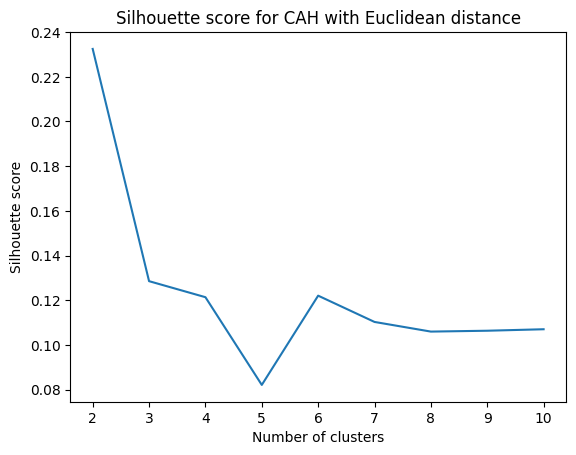

In [28]:
# silhouette score (the higher the better)
plot_silhouette(silhouettes_dict["CAH_EUC"],
                title="Silhouette score for CAH with Euclidean distance")

In [29]:
# # plot the top three levels of the dendrogram
# plot_dendrogram(clustering, truncate_mode="level", p=3)

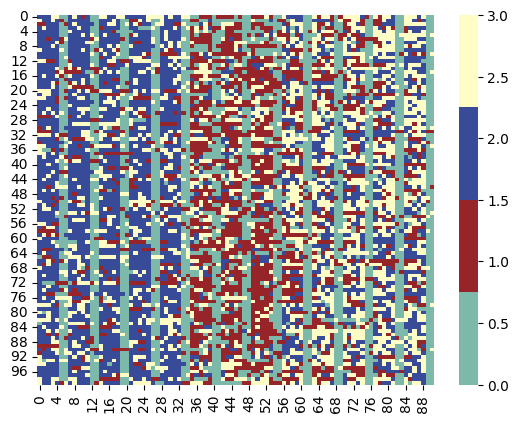

In [53]:
# display the clusters in a heatmap (Y) try different colormaps
Y = Y_matrices_dict["CAH_EUC"][4].reshape(100, 91)
plot_heatmap(Y)

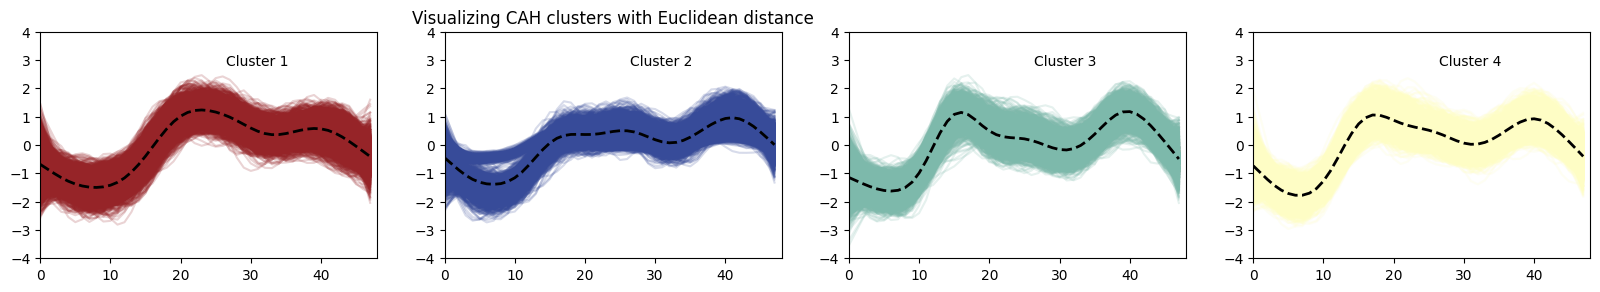

In [86]:
visualize_clusters(X, Y_matrices_dict["CAH_EUC"][4], title="Visualizing CAH clusters with Euclidean distance")

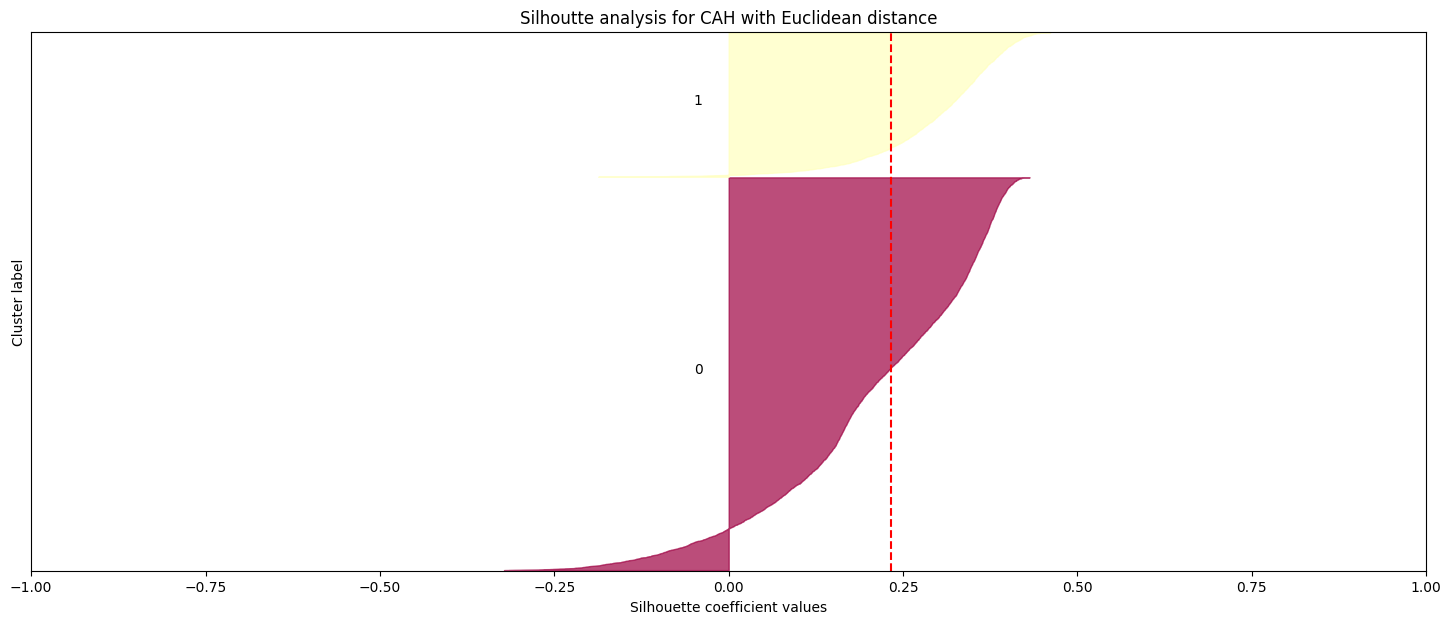

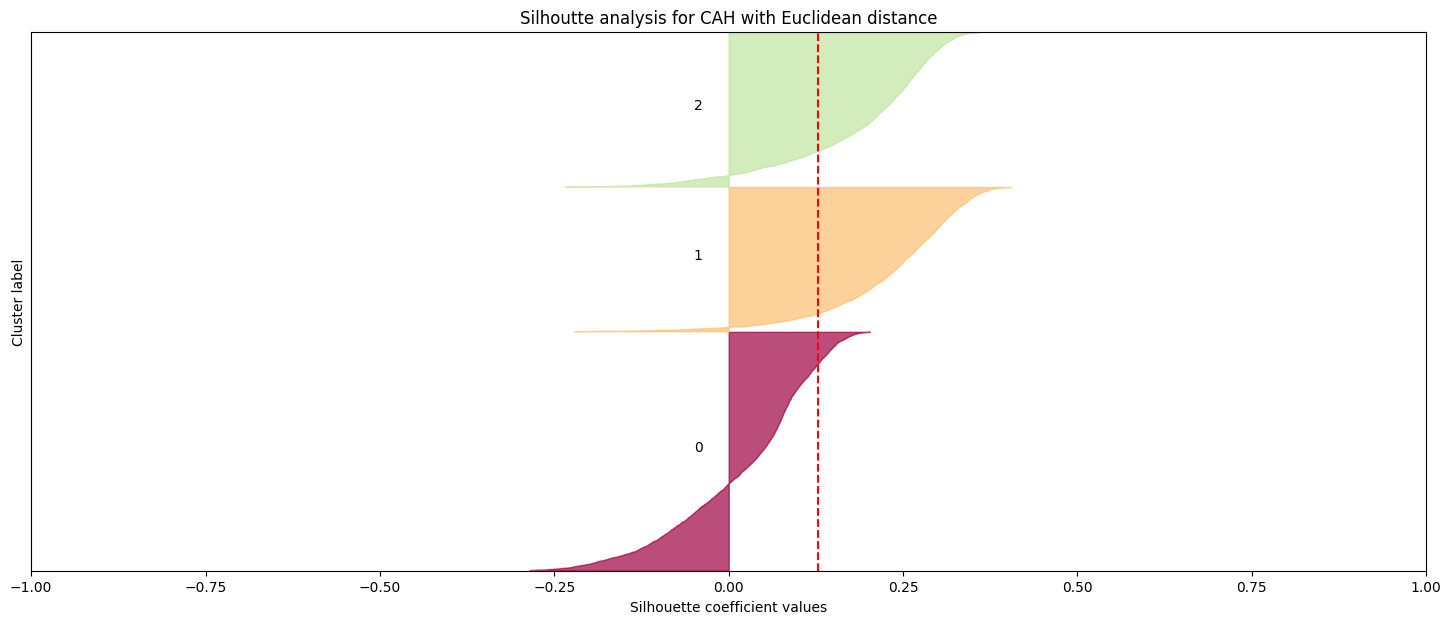

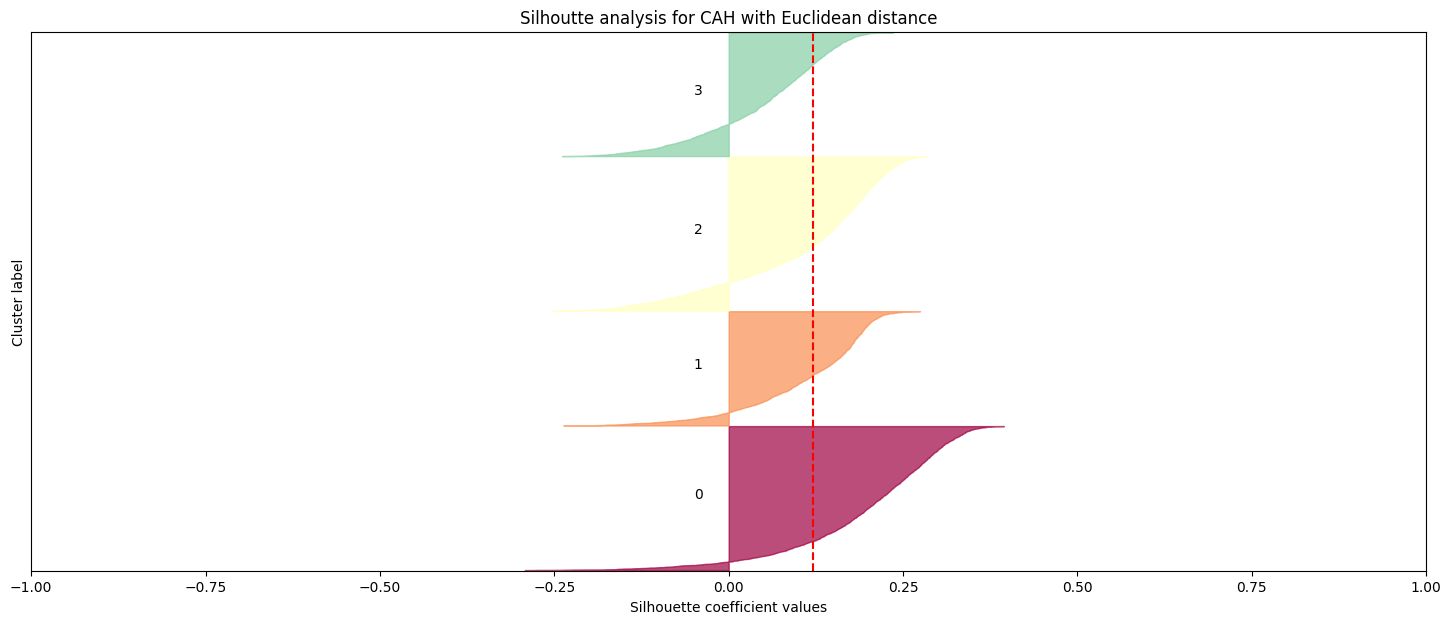

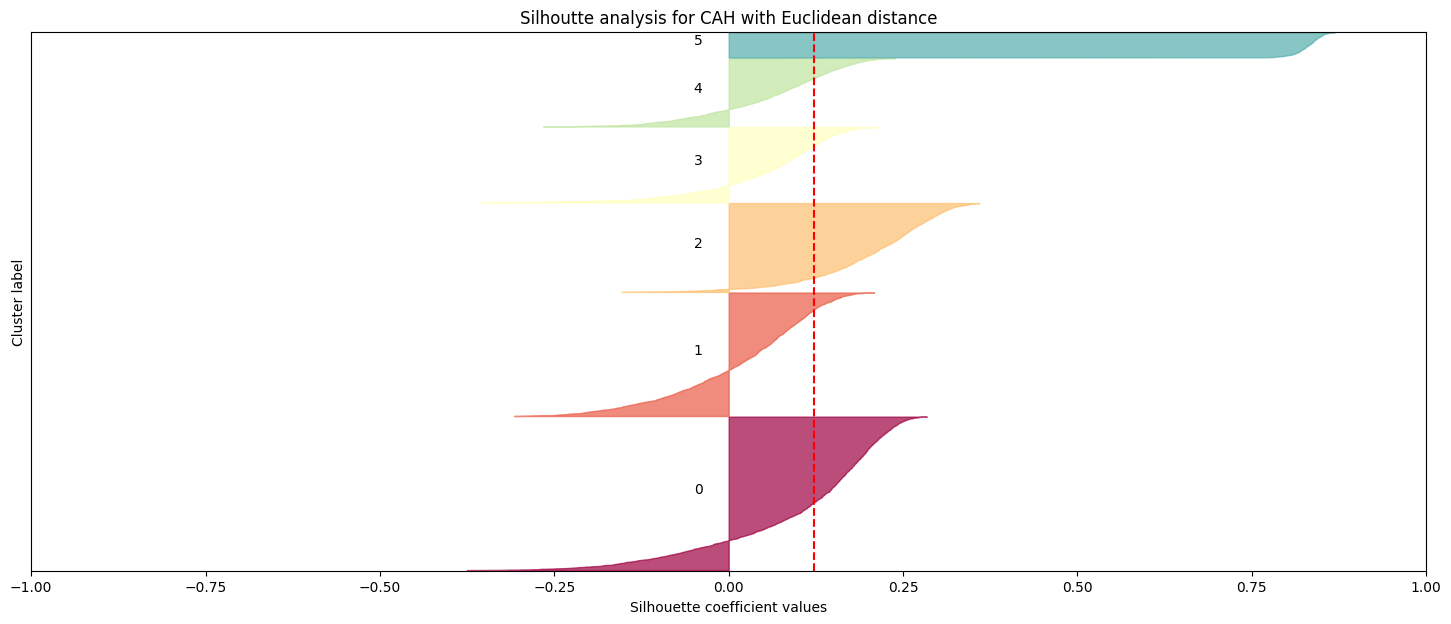

In [69]:
plot_silhouette_analysis(X, Y_matrices_dict["CAH_EUC"][2], "Silhoutte analysis for CAH with Euclidean distance")
plot_silhouette_analysis(X, Y_matrices_dict["CAH_EUC"][3], "Silhoutte analysis for CAH with Euclidean distance")
plot_silhouette_analysis(X, Y_matrices_dict["CAH_EUC"][4], "Silhoutte analysis for CAH with Euclidean distance")
plot_silhouette_analysis(X, Y_matrices_dict["CAH_EUC"][6], "Silhoutte analysis for CAH with Euclidean distance")

# KMeans

## Using euclidean distance

In [33]:
from sklearn.cluster import KMeans

clust_method = lambda k: KMeans(n_clusters=k, random_state=0, n_init='auto')
inertias, silhouettes, labels = run_clustering_method(clust_method, X, verbose=False, metric="euclidean")

inertias_dict["KMeans_EUC"] = inertias
silhouettes_dict["KMeans_EUC"] = silhouettes
Y_matrices_dict["KMeans_EUC"] = labels

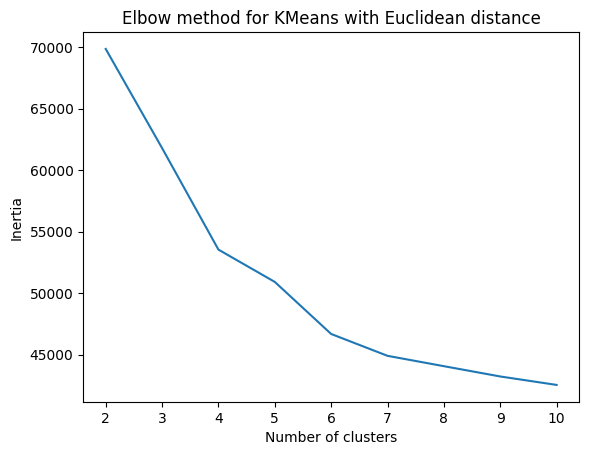

In [34]:
# plot inertia
plot_inertia(inertias_dict["KMeans_EUC"],
             title="Elbow method for KMeans with Euclidean distance")

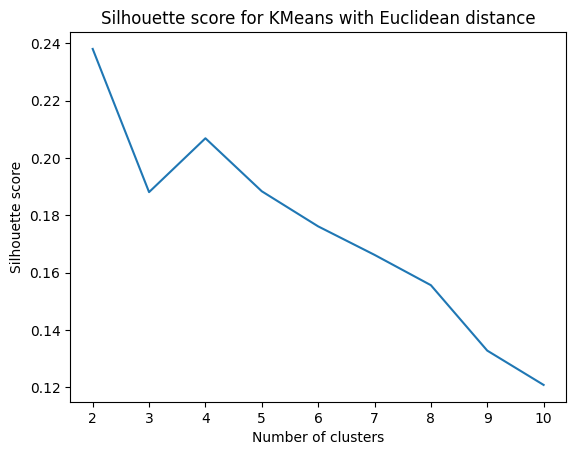

In [35]:
# silhouette score
plot_silhouette(silhouettes_dict["KMeans_EUC"],
                title="Silhouette score for KMeans with Euclidean distance")

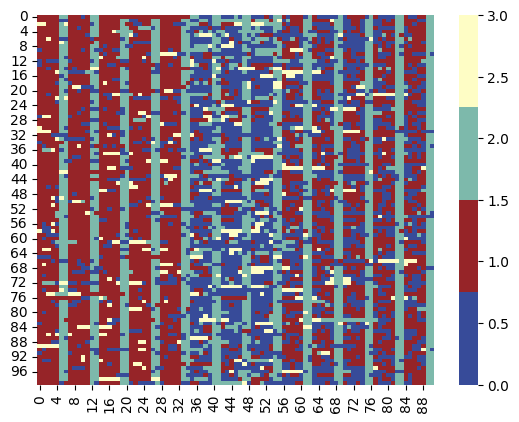

In [36]:
# display the clusters in a heatmap (Y) try different colormaps
Y = Y_matrices_dict["KMeans_EUC"][4].reshape(100, 91)
plot_heatmap(Y, cmap=[blue, red, green, yellow])

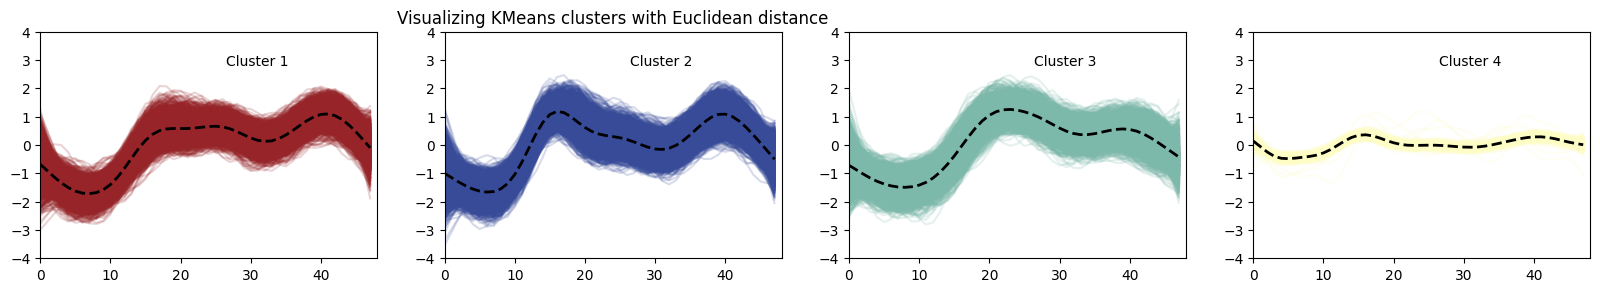

In [37]:
visualize_clusters(X, Y_matrices_dict["KMeans_EUC"][4], title="Visualizing KMeans clusters with Euclidean distance")

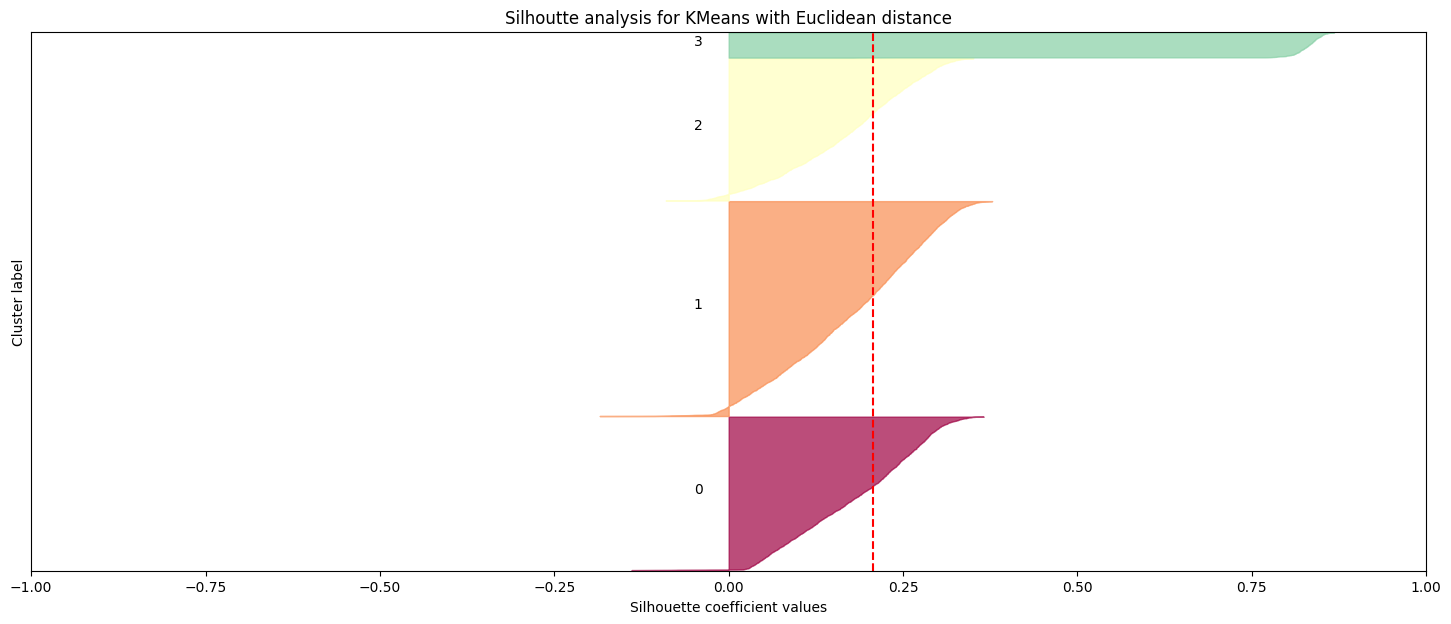

In [77]:
plot_silhouette_analysis(X, Y_matrices_dict["KMeans_EUC"][4], "Silhoutte analysis for KMeans with Euclidean distance")

# Partie 2

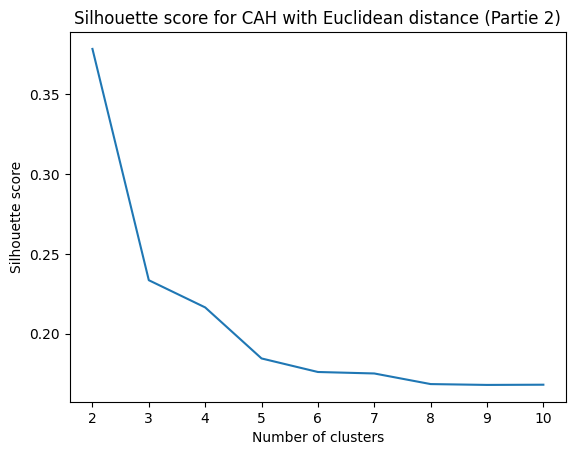

In [75]:
# We choose Eucledian CAH with 4 clusters
Y = Y_matrices_dict["CAH_EUC"][4].reshape(100, 91)

clust_method = lambda k: AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete', compute_distances=True)
inertias, silhouettes, labels = run_clustering_method(clust_method, Y.T, verbose=False, metric="euclidean")

# silhouette score
plot_silhouette(silhouettes, title="Silhouette score for CAH with Euclidean distance (Partie 2)")

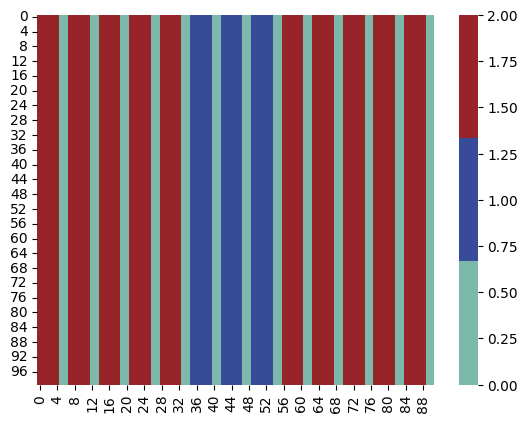

In [76]:
# for k = 3

# apply CAH on the columns of Y

cah = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(Y.T)
#labels des classes
labels = cah.labels_

plot_heatmap(np.tile(labels, (100, 1)), cmap=[green, blue, red])

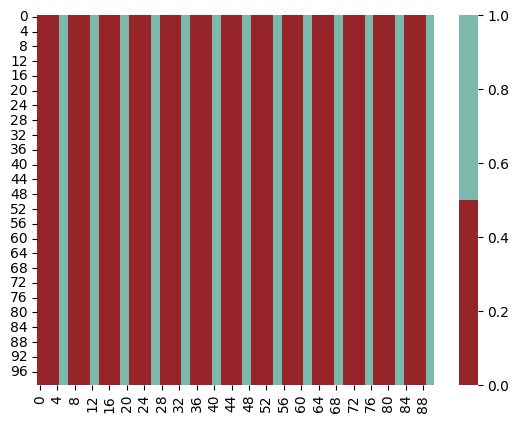

In [41]:
# for k = 2

# apply CAH on the columns of Y

cah = AgglomerativeClustering(n_clusters=2, linkage="complete").fit(Y.T)
#labels des classes
labels = cah.labels_

plot_heatmap(np.tile(labels, (100, 1)), cmap=[red, green])